In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib

df = pd.read_csv('Steamed Hams M+ Scores.csv').sort_values(['char_name','score'], ascending=False)
df['spec_cumulative'] =  df.groupby('char_name').cumcount()

#Subset - two specs, remove any with 0 score
df = df[df.score > 0]
df = df[df.spec_cumulative <= 1]

df

,Unnamed: 0,class,spec_n,char_name,score,spec_name,spec_short2,spec_short,spec_cumulative
120,120,Monk,spec_2,Zymzz,293.8,Windwalker,WW,WW,0
34,34,Demon Hunter,spec_1,Zymz,2643.0,Vengeance,VDH,VDH,0
30,30,Demon Hunter,spec_0,Zymz,1995.4,Havoc,HVC,Havoc,1
60,60,Evoker,spec_1,Zymsz,853.1,Preservation,PVOKE,Prevoker,0
63,63,Evoker,spec_2,Zymsz,216.4,Augmentation,AUG,Augvoker,1
...,...,...,...,...,...,...,...,...,...
132,132,Paladin,spec_1,Blessedthot,1903.4,Protection,PROT,Prot,0
142,142,Paladin,spec_2,Blessedthot,1006.8,Retribution,RET,Ret,1
141,141,Paladin,spec_2,Beardzz,1964.4,Retribution,RET,Ret,0
121,121,Paladin,spec_0,Beardzz,201.9,Holy,HPAL,HPal,1


In [5]:
df_agg = df[df.score > 0].groupby(['char_name','class'], as_index=False).agg(
    score_list=('score',list),
    spec_list=('spec_short',list))
df_agg['Total'] = df_agg['score_list'].apply(lambda x : sum(x))
df_agg.sort_values('Total', inplace=True, ascending=False)
df_agg = df_agg.reset_index().head(10)
df_agg

,index,char_name,class,score_list,spec_list,Total
0,30,Ibubble,Paladin,"[2514.6, 2453.4]","[Ret, Prot]",4968.0
1,53,Zymz,Demon Hunter,"[2643.0, 1995.4]","[VDH, Havoc]",4638.4
2,37,Oda,Shaman,"[2287.6, 2198.6]","[Enh, Ele]",4486.2
3,7,Dingboy,Priest,"[2108.3, 2038.8]","[Disc, Shadow]",4147.1
4,22,Fcs,Rogue,"[2672.5, 1377.8]","[Sub, Outlaw]",4050.3
5,24,Fxs,Mage,"[3006.3, 612.7]","[Fire, Frost]",3619.0
6,23,Fcz,Priest,"[2502.1, 872.3]","[Shadow, Disc]",3374.4
7,17,Eesow,Monk,"[3021.6, 230.7]","[WW, Brew]",3252.3
8,26,Handycap,Warlock,"[1976.9, 1145.7]","[Demo, Destro]",3122.6
9,15,Eesoh,Priest,"[2717.8, 368.5]","[Holy, Shadow]",3086.3


In [6]:
# Set Class Colour Schemes

class_colours = {
    'Monk':['#00FF98','#6effae'],
    'Death Knight':['#c41e3a','#d65960'],
    'Demon Hunter':['#A330C9','#b762d6'],
    'Druid':['#FF7C0A','#ff9957'],
    'Evoker':['#33937F','#4d9e8b'],
    'Hunter':['#AAD372','#b2d881'],
    'Mage':['#3FC7EB','#5ccded'],
    'Paladin':['#F48CBA','#f698c1'],
    'Priest':['#FFFFFF','#f2f2f2'],
    'Rogue':['#FFF468','#fff78e'],
    'Shaman':['#0070DD','#2e80e2'],
    'Warlock':['#8788EE','#9294f1'],
    'Warrior':['#C69B6D','#cca57c']}

In [7]:
df_agg['colours'] = df_agg['class'].map(class_colours)
df_agg

,index,char_name,class,score_list,spec_list,Total,colours
0,30,Ibubble,Paladin,"[2514.6, 2453.4]","[Ret, Prot]",4968.0,"[#F48CBA, #f698c1]"
1,53,Zymz,Demon Hunter,"[2643.0, 1995.4]","[VDH, Havoc]",4638.4,"[#A330C9, #b762d6]"
2,37,Oda,Shaman,"[2287.6, 2198.6]","[Enh, Ele]",4486.2,"[#0070DD, #2e80e2]"
3,7,Dingboy,Priest,"[2108.3, 2038.8]","[Disc, Shadow]",4147.1,"[#FFFFFF, #f2f2f2]"
4,22,Fcs,Rogue,"[2672.5, 1377.8]","[Sub, Outlaw]",4050.3,"[#FFF468, #fff78e]"
5,24,Fxs,Mage,"[3006.3, 612.7]","[Fire, Frost]",3619.0,"[#3FC7EB, #5ccded]"
6,23,Fcz,Priest,"[2502.1, 872.3]","[Shadow, Disc]",3374.4,"[#FFFFFF, #f2f2f2]"
7,17,Eesow,Monk,"[3021.6, 230.7]","[WW, Brew]",3252.3,"[#00FF98, #6effae]"
8,26,Handycap,Warlock,"[1976.9, 1145.7]","[Demo, Destro]",3122.6,"[#8788EE, #9294f1]"
9,15,Eesoh,Priest,"[2717.8, 368.5]","[Holy, Shadow]",3086.3,"[#FFFFFF, #f2f2f2]"


In [8]:
# Chart Generation

In [9]:
def barGen(class_name, scores, colors, specs, total, y_pos):
    ax.barh(class_name, scores[0], color=colors[0], left=0, edgecolor='#2c2f33', linewidth=0.1) #Spec 0 Bar 
    ax.barh(class_name, scores[1], color=colors[1], left=scores[0], edgecolor='#2c2f33', linewidth=0.1) #Spec 1 Bar

    plt.text(total*(1/3), y_pos, f'{specs[0]}\n{scores[0]}', ha='center', va='center', fontsize='large', #fontweight='bold'
             ) #Spec 0 score
    plt.text(total*(2/3), y_pos,f'{specs[1]}\n{scores[1]}', ha='center', va='center', fontsize='large', #fontweight='bold'
             ) #Spec 1 Score
    plt.text((scores[0]+scores[1])*1.01, y_pos,f'{round(total,2)}', ha='left', va='center', fontsize='large', backgroundcolor="white") #Total Score

    #plt.text(scores[0]/2, y_pos, f'{specs[0]}\n{scores[0]}', ha='center', va='center', fontsize='medium', fontweight='bold'
    #         ) #Spec 0 score
    #plt.text(scores[0]+scores[1]/2, y_pos,f'{specs[1]}\n{scores[1]}', ha='center', va='center', fontsize='medium', fontweight='bold'
    #         ) #Spec 1 Score
    #plt.text((scores[0]+scores[1])*1.01, y_pos,f'{round(total,2)}', ha='left', va='center', fontsize='medium', backgroundcolor="white") #Total Score

In [10]:
4968.0 * (1/3)

1656.0

### Set the plt text marks at thirds to open up more flexibility on text size

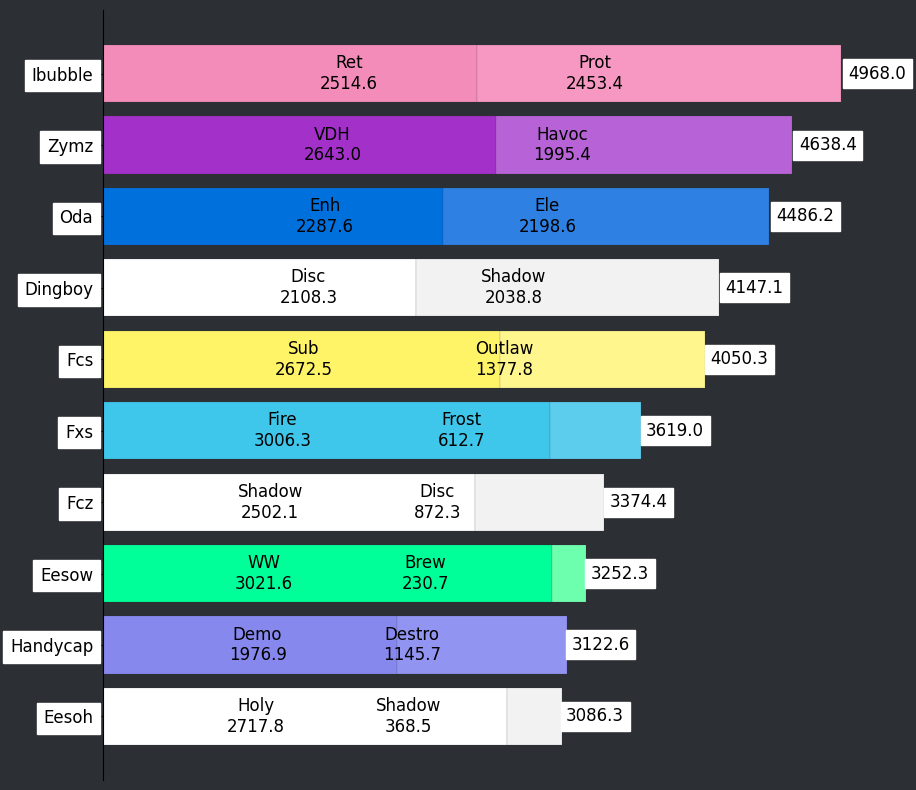

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#2c2f33')
ax.set_facecolor('#2c2f33')
ax.yaxis.label.set_color('red')

#plt.title('Steamed Hams Double Threat Competition\n3 November 2023', color='white')

for i in df_agg.index:
    barGen(df_agg.loc[i]['char_name'],
           scores=df_agg.loc[i]['score_list'],
           colors=df_agg.loc[i]['colours'],
           specs=df_agg.loc[i]['spec_list'],
           total=df_agg.loc[i]['Total'],
           y_pos=i)
    
plt.gca().invert_yaxis()
plt.gca().set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)



plt.setp(ax.get_yticklabels(), backgroundcolor="white", fontsize='large')

plt.savefig('double_threat.png', bbox_inches='tight')